In [52]:
cd G:/01.projects/COVID-19/Virus_Junction/Ribozero/jumps_bystrand/dedup/

G:\01.projects\COVID-19\Virus_Junction\Ribozero\jumps_bystrand\dedup


In [53]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from Bio import SeqIO, Seq
import os

In [54]:
orfcolors = {'ORF1a': '#FFF8DC',
 'ORF1b': '#FFE4C4',
 'S': '#7FFFD4',
 'ORF3a': '#F08080',
 'E': '#82c91e',
 'M': '#8470FF',
 'ORF6': '#FF34B3',
 'ORF7a': '#00C78C',
 'ORF7b': '#698B22',
 'ORF8': '#1874CD',
 'N': '#EEEE00',
'ORF10': '#c5d9ea',
            'ORF1ab': '#c5d9ea'}

In [55]:
annotations = pd.read_csv('../../../../reference/SARS-CoV-2-annotations_edited.gff',
                   sep='\t', names=['chrom', 'type', 'name', 'start', 'end', 'x', 'y', 'z'])
annotations['start'] -= 1

# Non Leader
#cdsanno = annotations[(annotations['type'] == 'CDS') &
#                      (~annotations['name'].isin(['ORF10', 'nsp11', 'frameshift']))]

# Leader
cdsanno = annotations[(annotations['type'] == 'CDS') &
                      (~annotations['name'].isin([ 'nsp1', 'frameshift'])) &
                      (~annotations['name'].apply(lambda x: x.startswith('nsp')))]
cdsanno = pd.concat([
    cdsanno,
    pd.DataFrame([
        pd.Series(['chrSCV', 'CDS', 'ORF1a', 268, 13470, 0.0, '.', '.'], index=cdsanno.columns),
        pd.Series(['chrSCV', 'CDS', 'ORF1b', 13470, 21555, 0.0, '.', '.'], index=cdsanno.columns),
    ])
]).sort_values(by='start').reset_index(drop=True).iloc[:, :5]

cdsanno

,chrom,type,name,start,end
0,chrSCV,CDS,ORF1a,268,13470
1,chrSCV,CDS,ORF1b,13470,21555
2,chrSCV,CDS,S,21565,25387
3,chrSCV,CDS,ORF3a,25395,26223
4,chrSCV,CDS,E,26247,26475
5,chrSCV,CDS,M,26525,27194
6,chrSCV,CDS,ORF6,27204,27390
7,chrSCV,CDS,ORF7a,27396,27762
8,chrSCV,CDS,ORF7b,27758,27890
9,chrSCV,CDS,ORF8,27896,28262


In [56]:
annotations

,chrom,type,name,start,end,x,y,z
0,chrSCV,CDS,E,26247,26475,0.0,.,.
1,chrSCV,CDS,M,26525,27194,0.0,.,.
2,chrSCV,CDS,N,28276,29536,0.0,.,.
3,chrSCV,CDS,ORF10,29560,29677,0.0,.,.
4,chrSCV,CDS,ORF3a,25395,26223,0.0,.,.
5,chrSCV,CDS,ORF6,27204,27390,0.0,.,.
6,chrSCV,CDS,ORF7a,27396,27762,0.0,.,.
7,chrSCV,CDS,ORF7b,27758,27890,0.0,.,.
8,chrSCV,CDS,ORF8,27896,28262,0.0,.,.
9,chrSCV,CDS,S,21565,25387,0.0,.,.


In [35]:
covseq = str(next(SeqIO.parse('../../../../reference/COVID19.fasta', 'fasta')).seq)

In [43]:
import re
len(re.findall('A',covseq))/len(covseq)

0.2988859522933324

In [45]:
len(re.findall('G',covseq))/len(covseq)

0.19627981666722424

In [44]:
len(re.findall('T',covseq))/len(covseq)

0.3211334515405975

In [46]:
len(re.findall('C',covseq))/len(covseq)

0.1837007794988458

In [47]:
sarsseq = str(next(SeqIO.parse('../../../../reference/other virus/GCA_000864885.1_ViralProj15500_genomic.fna', 'fasta')).seq)

In [48]:
print('A: ', len(re.findall('A', sarsseq))/len(sarsseq))
print('T:', len(re.findall('T', sarsseq))/len(sarsseq))
print('G:', len(re.findall('G', sarsseq))/len(sarsseq))
print('C:', len(re.findall('C', sarsseq))/len(sarsseq))

A:  0.2850660482000605
T: 0.3073174010957615
G: 0.20795939632281268
C: 0.19965715438136533


In [6]:
def junc_product(largedels_mgi):
    SNEEKSIZE = 12
    largedel_anno = []
    for _, row in largedels_mgi.iterrows():
        seqleft = covseq[:row.j5]
        seqright = covseq[row.j3:]
        seqrecomb = seqleft + seqright

        if 'ATG' in seqrecomb:
            # calculate start codon positions
            startpos_recomb = seqrecomb.find('ATG')
            if startpos_recomb < row.j5:
                startpos = startpos_recomb
            else:
                startpos = startpos_recomb - row.j5 + row.j3

            # calculate protein product size
            orfcandseq = seqrecomb[startpos_recomb:]
            if len(orfcandseq) % 3 > 0:
                orfcandseq += 'N' * (3 - len(orfcandseq) % 3)

            translation = Seq.Seq(orfcandseq).translate().split('*')[0]
            #if row['name'] == 'j2':
            #    print(Seq(orfcandseq).translate())
            product_size = len(translation)
        else:
            startpos_recomb = -1
            startpos = -1
            product_size = 0
            translation = ''

        #recombseq = covseq[row.j5 - SNEEKSIZE:row.j5].lower() + (
        #    covseq[row.j3:row.j3 + SNEEKSIZE])

        largedel_anno.append([row['j5'], row['j3'], row['strand'], row['count'],
                              startpos, product_size, row['sample']])

    largedel_anno = pd.DataFrame(largedel_anno, columns=[
        'j5', 'j3','strand', 'count', 'startpos', 'productsize','sample'])
    largedel_anno = largedel_anno.sort_values(by='count', ascending=False).reset_index(drop=True)
    #largedel_anno.groupby('startpos').agg({'count': 'sum', 'j5': 'first', 'j3': 'first',
                                     # 'productsize': 'first'}).sort_values(by='count',
                                      #                                    ascending=False)
    return largedel_anno


In [7]:
def measure_translation_length(startpos):
    seq = covseq[startpos:]
    if len(seq) % 3 > 0:
        seq += 'N' * (3 - (len(seq) % 3))
    return len(Seq.Seq(seq).translate().split('*')[0])

def annotate_orf(startpos):
    ovl_cds = (
        cdsanno[(cdsanno['start'] <= startpos) &
                (startpos < cdsanno['end'])])

    if len(ovl_cds) >= 2:
        ovl_cds = ovl_cds[~ovl_cds['name'].apply(lambda x: x.startswith('nsp') or x == 'ORF7b')]
        if len(ovl_cds) != 1:
            raise ValueError("Unresolvable conflict: " + ' '.join(ovl_cds['name']))
    elif len(ovl_cds) < 1:
        # Downstream
        nextcdses = cdsanno[cdsanno['start'] >= startpos]
        if len(nextcdses) == 0:
            return 'noORF', None, None
        nextcds = nextcdses.iloc[0]
        offset = nextcds['start'] - startpos
        if offset % 3 == 0:
            return 'N-term addition', nextcds['name'], offset // 3
        else:
            return 'frameshift,5p', nextcds['name'], offset
    
    # Single-hit within a known CDS
    ovl_cds = ovl_cds.iloc[0]
    offset = startpos - ovl_cds['start']
    if offset % 3 == 0:
        return 'N-term trunc', ovl_cds['name'], offset // 3
    
    neworflength = measure_translation_length(startpos)
    return 'frameshift,mid', ovl_cds['name'], neworflength

annotate_orf(27827)

('N-term trunc', 'ORF7b', 23)

In [8]:
def test_startcodon_fusiogenesis(row):
    fuse = covseq[int(row['j5'])-2:int(row['j5'])] + covseq[int(row['j3']):int(row['j3'])+2]
    #the sentence above is right, since the output in _jumps.txt file is : junction startpos(1st base of intrem). endpos(1st base of next exon)
    if 'ATG' in fuse:
        position = fuse.index('ATG') # 0 or 1
        return 2-position
    else:
        return -1 #'ATG' is not on the joint site


In [9]:
def measure_translation_length_by_seq(seq):
    if len(seq) % 3 > 0:
        seq += 'N' * (3 - (len(seq) % 3))
    return len(Seq.Seq(seq).translate().split('*')[0])

def annotate_orf_by_joint_position(row):
    j5, j3 = row['j5'], row['j3']
    j5_1 = j5 - 1 # last nucleotide in the 5' fragment

    ovl_cds5 = (
        cdsanno[(cdsanno['start'] <= j5_1) & (j5_1 < cdsanno['end'])])

    if len(ovl_cds5) >= 2:
        ovl_cds5 = ovl_cds5[~ovl_cds5['name'].apply(lambda x: x.startswith('nsp') or x == 'ORF7b')]
        if len(ovl_cds5) != 1:
            raise ValueError("Unresolvable conflict: {} ".format(j5_1) + ' '.join(ovl_cds5['name']))
    elif len(ovl_cds5) < 1:
        # j5 is in the middle of non-coding region. Use the downstream of j3
        nextcdses = cdsanno[cdsanno['start'] >= j3]
        if len(nextcdses) == 0:
            return 'no-orf', None, None
        nextcds = nextcdses.iloc[0]
        return 'may-translate', nextcds['name'], nextcds['start'] - j3
    
    # Single-hit within a known CDS
    ovl_cds5 = ovl_cds5.iloc[0]
    offset5 = j5 - ovl_cds5['start']
    seqleft = covseq[ovl_cds5['start']:j5]
    seqright = covseq[j3:]
    frame5 = len(seqleft) % 3

    # Find 3' position identity
    ovl_cds3 = (
        cdsanno[(cdsanno['start'] <= j3) & (j3 < cdsanno['end'])])
    if len(ovl_cds3) >= 2:
        ovl_cds3 = ovl_cds3[~ovl_cds3['name'].apply(lambda x: x.startswith('nsp') or x == 'ORF7b')]
        if len(ovl_cds3) != 1:
            raise ValueError("Unresolvable conflict: {} ".format(j3) + ' '.join(ovl_cds3['name']))
    elif len(ovl_cds3) < 1:
        # j5 is in ORF, j3 is not in ORF.
        product_len = measure_translation_length_by_seq(seqleft + seqright)

        nextcdses = cdsanno[cdsanno['start'] >= j3]
        if len(nextcdses) > 0:
            nextcds = nextcdses.iloc[0]
            nextstartoffset = nextcds['start'] - j3
            if product_len > (offset5 + nextstartoffset) / 3:
                return 'mid-utr-inserted-fusion', '{}-{}'.format(ovl_cds5['name'], nextcds['name']), (offset5/3, nextstartoffset/3)

        return 'C-term-trunc-and-extension-by-UTR', ovl_cds5['name'], (offset5/3, product_len)

    # Single-hit within a known CDS for 3' site too.
    ovl_cds3 = ovl_cds3.iloc[0]
    offset3 = j3 - ovl_cds3['start']
    remaining3 = ovl_cds3['end'] - j3
    frame3 = offset3 % 3
    
    if frame5 == frame3:
        return 'in-frame-fusion-orf', '{}-{}'.format(ovl_cds5['name'], ovl_cds3['name']), (offset5/3, remaining3/3)

    product_len = measure_translation_length_by_seq(seqleft + seqright)
    return 'frameshift-fusion-orf', '{}-{}'.format(ovl_cds5['name'], ovl_cds3['name']), (offset5/3, product_len)



In [10]:
from matplotlib.patches import Rectangle
def common_tune(ax):
    ax.set_xlim(-.1, 29950)
    ax.set_ylim(-12, 12)

    for spname in 'top left right'.split():
        ax.spines[spname].set_visible(False)
    plt.setp(ax.get_yticklines(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)

In [11]:
ANCHOR_TOP = 1.5
ANCHOR_BOTTOM = -1.5
APEX_TOP = 9
APEX_BOTTOM = -9

def draw_bar(ax):
    for _, row in cdsanno.iterrows():
        if row['name'].startswith('nsp'):
            continue
        rect = Rectangle((row['start'], ANCHOR_BOTTOM), row['end'] - row['start'], ANCHOR_TOP-ANCHOR_BOTTOM, fc=orfcolors[row['name']])
        ax.add_patch(rect)

    rect = Rectangle((0, ANCHOR_BOTTOM), 265, ANCHOR_TOP-ANCHOR_BOTTOM, fc='#505050')
    ax.add_patch(rect)
    rect = Rectangle((265, ANCHOR_BOTTOM), 13441-265, ANCHOR_TOP-ANCHOR_BOTTOM, fc='#c5d9ea')
    ax.add_patch(rect)
    rect = Rectangle((13441, ANCHOR_BOTTOM), 21552-13441, ANCHOR_TOP-ANCHOR_BOTTOM, fc='#e8d2c4')
    ax.add_patch(rect)
    #rect = Rectangle((29533, ANCHOR_BOTTOM), 29930-29533, ANCHOR_TOP-ANCHOR_BOTTOM, fc='#d0d0d0')
    rect = Rectangle((29536, ANCHOR_BOTTOM), 29930-29536, ANCHOR_TOP-ANCHOR_BOTTOM, fc='#d0d0d0')
    ax.add_patch(rect)

In [12]:
def draw_junction(ax, start, end, top, height_coef=1, **kwds):
    distance = (end - start)

    height = max(1, height_coef * .015 * distance ** .6)
    curve = 3 * height ** .5
    pleft = start + distance / curve
    pmid = start + distance / 2
    pright = start + distance * (curve - 1) / curve
    anchor = ANCHOR_TOP if top else ANCHOR_BOTTOM
    apex = ANCHOR_TOP+height if top else ANCHOR_BOTTOM-height
    
    if 'edgecolor' in kwds:
        pass
    elif top:
        kwds['edgecolor'] = '#364fc7'
    else:
        kwds['edgecolor'] = '#c92a2a'
    pp1 = mpatches.PathPatch(
        Path([(start, anchor), (pleft, apex), (pmid, apex), (pright, apex), (end, anchor)],
             [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CURVE3, Path.MOVETO]),
        fc="none", transform=ax.transData, **kwds)
    ax.add_patch(pp1)

In [13]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
Path = mpath.Path
ALPHA_MAP = [
    [1000, 1.0],
    [500, 0.5],
    [200, 0.3],
    [100, 0.2],
    [50, 0.1],
    [0, 0.01]
]
def calc_alpha(jnc):
    for mincnt, alpha in ALPHA_MAP:
        if jnc['count'] >= mincnt:
            return alpha
    return 0



In [14]:
def draw_patterns(can_prod, can_inframe, can_outframe, nc_distal, nc_proximal, title, outdir):
    fig, ax = plt.subplots(4, 1, figsize=(5.4, 8))

    draw_bar(ax[0])
    for _, jnc in can_prod.iloc[:100].iterrows():
        alpha = calc_alpha(jnc)
        draw_junction(ax[0], jnc.j5, jnc.j3, top=True,
                      alpha=alpha, height_coef=1.2, lw=.6)
    common_tune(ax[0])
    ax[0].set_title('TRSL-dependent,Canonical')
    
    draw_bar(ax[1])
    for _, jnc in can_inframe.iloc[:100].iterrows():
        alpha = calc_alpha(jnc)
        draw_junction(ax[1], jnc.j5, jnc.j3, top=True,
                      alpha=alpha, height_coef=1, lw=.6)

    for _, jnc in can_outframe.iloc[:100].iterrows():
        alpha = calc_alpha(jnc)
        draw_junction(ax[1], jnc.j5, jnc.j3, top=False,
                      alpha=alpha, height_coef=1, lw=.6)

    common_tune(ax[1])
    ax[1].set_title('TRSL-dependent-NonCanonical')
    
    draw_bar(ax[2])
    for _, jnc in nc_distal.iloc[:100].iterrows():
        alpha = calc_alpha(jnc)
        draw_junction(ax[2], jnc.j5, jnc.j3, top=('in-frame' in jnc.evtype), alpha=alpha,
                      lw=.6)

    common_tune(ax[2])
    ax[2].set_title('TRSL-independent-distal')
    
    draw_bar(ax[3])
    for _, jnc in nc_proximal.iloc[:100].iterrows():
        alpha = calc_alpha(jnc)
        draw_junction(ax[3], jnc.j5, jnc.j3, top=('in-frame' in jnc.evtype),
                      alpha=alpha, height_coef=5, lw=.6)
    common_tune(ax[3])
    ax[3].set_title('TRSL-independent,proximal')
    plt.tight_layout()
    plt.savefig(os.path.join(outdir,title+ '_patterns.pdf'))



In [15]:
from io import StringIO
ORForder = list(orfcolors.keys())
ORForder = ['ORF1ab'] + ORForder[2:]

orfcolors['ORF1ab'] = orfcolors['ORF1a']
def calcRatio(can_prod_counts, nonproductive_counts, title=None, outdir = None):
 
    can_prod_counts['order'] = can_prod_counts['orf'].apply(lambda x: ORForder.index(x))
    can_prod_counts['color'] = can_prod_counts['orf'].apply(lambda x: orfcolors[x])
    nonproductive_counts['order'] = np.arange(len(nonproductive_counts)) + 100
    nonproductive_counts['color'] = ['#' + ('%02x' % int(i) * 3)
                                 for i in np.linspace(0, 200, len(nonproductive_counts))]
    fullcounts = pd.concat([can_prod_counts, nonproductive_counts]).reset_index(drop=True)
    fullcounts['pct'] = fullcounts['count'] / fullcounts['count'].sum() * 100
    fullcounts = fullcounts.sort_values(by='order').copy()
    fullcounts['bottom'] = [0] + fullcounts['pct'].cumsum().tolist()[:-1]
    fullcounts['top'] = fullcounts['bottom'] + fullcounts['pct']
    
    if title:
        fullcounts['sample'] = title
    
    fig, ax = plt.subplots(1, 1, figsize=(5.6, 1.5))

    for _, row in fullcounts.iterrows():
        ax.barh([0.5], [row['pct']], 1, left=[row['bottom']],
               fc=row['color'], zorder=1)
        if row['pct'] >= 1:
            ax.annotate(row['orf'].replace('ORF', ''), ((row['bottom'] + row['top'])/2, 0.5),
                        ha='center', fontsize=12, va='center')

    ax.set_xlim(0, 100)
    for spname in 'top left right bottom'.split():
        ax.spines[spname].set_visible(False)

    plt.setp(ax.get_yticklines(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.set_xlabel('Junction-spanning reads (%)')

    plt.tight_layout()
    plt.savefig(os.path.join(outdir, title+'plot-jctstats.pdf'))
    
    return fullcounts
    
    

In [16]:
import os
def main(largedels_mgi, title, strand, dir):
    largedels_mgi = largedels_mgi.copy()
    outdir = os.path.join(dir, title)
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    outdir = outdir
    if 'sample' not in largedels_mgi.columns:
        largedels_mgi['sample'] = title
    largedel_anno = junc_product(largedels_mgi)
    largedel_anno['event'] = largedel_anno[['j5','j3']].astype(str).agg('-'.join, axis=1)
    largedel_anno.to_csv(os.path.join(outdir, title + 'production_anno.csv'), index = 0)
    #BLACKLIST = [
    #    [26256, 26283], # mixed substrain with partial deletion in genomic RNA
    #]

    #for blkstart, blkend in BLACKLIST:
     #   largedel_anno = largedel_anno[~((largedel_anno['j5'] == blkstart) &
      #                                  (largedel_anno['j3'] == blkend))]
    #alljuncNum = largedel_anno['count'].sum()

    #CANONICAL_START = 59 # 0-based, inc
    #CANONICAL_END = 80 # 0-based, noninc
    CANONICAL_START = 62 # 0-based, inc
    CANONICAL_END = 83 # 0-based, noninc

    is_cano = largedel_anno['j5'].between(CANONICAL_START, CANONICAL_END-1)
    ld_cano = largedel_anno[is_cano]
    summary = largedel_anno.copy()
    summary['pattern'] = None
    summary = pd.merge(summary, cdsanno, left_on = 'startpos', right_on = 'start',how = 'left').sort_values(by = 'count', ascending = False)
    #summary[~summary['name'].isnull())['pattern'] = 'TRSL-can'
    
    ld_noncano = largedel_anno[~is_cano]

    #ld_cano['count'].sum(), ld_noncano['count'].sum()

    can_prod = pd.merge(ld_cano, cdsanno, left_on='startpos', right_on='start').sort_values(by='count', ascending = False)
    #can_prod['count'].sum()
    can_prod.to_csv(os.path.join(outdir, title + '-canonical.csv'))
    can_prod_counts = can_prod.groupby('name').agg({'count': 'sum'}).sort_values(by='count', ascending=False)
    can_prod_counts.reset_index(inplace = True)
    can_prod_counts.columns=['orf', 'count']
    
    can_prod_counts=can_prod_counts.append([{'orf':'ORF1ab','count':0}], ignore_index = True)
    can_prod_counts.index = can_prod_counts['orf']
    if 'ORF1a' in can_prod_counts['orf']:
        can_prod_counts.loc['ORF1ab','count'] += can_prod_counts.loc['ORF1a','count']
        can_prod_counts = can_prod_counts.drop(index = ['ORF1a'])
    if 'ORF1b' in can_prod_counts['orf']:
        can_prod_counts.loc['ORF1ab','count'] += can_prod_counts.loc['ORF1b','count']
        can_prod_counts = can_prod_counts.drop(index = [ 'ORF1b'])
    can_prod_counts.to_csv(os.path.join(outdir, title+'-canonical-groupbyGeneBody.csv'), index = 0)
    
    
    
    can_nonprod = pd.merge(ld_cano, cdsanno, left_on='startpos', right_on='start', how='left')
    can_nonprod = can_nonprod[can_nonprod['name'].isnull()]
    can_nonprod.to_csv(os.path.join(outdir, title+'-canonical-nonprod.csv'))
    fusestart_pos = can_nonprod.apply(test_startcodon_fusiogenesis, axis=1)

    fusestarted = can_nonprod[fusestart_pos >= 0].copy()#'ATG' on the joint site
    fusestarted['startpos_byfusion'] = fusestarted['j3'] - fusestart_pos[fusestart_pos >= 0]
    remaining = can_nonprod[fusestart_pos < 0] #'ATG' not on the joint site
    #fusestarted['count'].sum(), remaining['count'].sum()
    

    fusestarted_annotation = fusestarted['startpos_byfusion'].apply(annotate_orf)
    fusestarted_annotation = fusestarted_annotation.apply(pd.Series)
    fusestarted_annotation.columns = ['evtype', 'evrelorf', 'evsize']
    fusestarted = pd.concat([
        fusestarted,
        fusestarted_annotation], axis=1)
    print('fusestarted', fusestarted.head())
    
    if len(fusestarted) > 0:
        fanno = fusestarted.groupby(['evtype', 'evrelorf']).agg({'count': 'sum'})
        print(fanno['count'].sum())
        #fusestarted['count'].sum()
        fanno.to_excel(os.path.join(outdir, title+'-canonical-nonprod-fusestarted-groupbyGeneBody.xlsx'))
        
        fuse_inframe = fusestarted[fusestarted['evtype'].isin(['N-term addition'])]['j5 j3 count event'.split()]
        fuse_outframe = fusestarted[~fusestarted['evtype'].isin(['N-term addition'])]['j5 j3 count event'.split()]
    
    annotation = remaining['startpos'].apply(annotate_orf)
    annotation = annotation.apply(pd.Series)
    annotation.columns = ['evtype', 'evrelorf', 'evsize']
    remaining = pd.concat([
        remaining, annotation], axis=1)
    #remaining.head()
    print('remaining count:', remaining['count'].sum())
    remaining.groupby('evtype').agg({'count': 'sum'})
    remaining.groupby(['evtype', 'evrelorf']).agg({'count': 'sum'})
    #remaining[remaining['evtype'] == 'frameshift,mid'].head(30)
    #partialS = str(Seq.Seq(covseq[2477:][36:]).translate().split('*')[0])
    #fullS = str(Seq.Seq(covseq[21565:]).translate().split('*')[0])
    #fullS.count('M') / len(fullS)

    ld_noncano['count'].sum()

    delsize = ld_noncano['j3'] - ld_noncano['j5']
    nc_distal = ld_noncano[delsize >= 5000].copy()
    nc_proximal = ld_noncano[delsize < 5000].copy()
    nc_distal['count'].sum(), nc_proximal['count'].sum()

    annotation = nc_distal.apply(annotate_orf_by_joint_position, axis=1)
    annotation = annotation.apply(pd.Series)
    annotation.columns = ['evtype', 'evrelorf', 'evsize']
    nc_distal = pd.concat([
        nc_distal, annotation], axis=1)
    nc_distal = nc_distal.sort_values(by='count', ascending = False)

    nc_distal.groupby('evtype').agg({'count': 'sum'})
    nc_distal.groupby(['evtype', 'evrelorf']).agg({'count': 'sum'}).to_excel(os.path.join(outdir,title+ 'nc-distal.xlsx'))

    annotation = nc_proximal.apply(annotate_orf_by_joint_position, axis=1)
    annotation = annotation.apply(pd.Series)
    annotation.columns = ['evtype', 'evrelorf', 'evsize']
    nc_proximal = pd.concat([
        nc_proximal, annotation], axis=1)
    nc_proximal = nc_proximal.sort_values(by='count', ascending = False)

    nc_proximal.groupby('evtype').agg({'count': 'sum'})
    nc_proximal.groupby(['evtype', 'evrelorf']).agg({'count': 'sum'}).to_excel(os.path.join(outdir, title+'nc-proximal.xlsx'))

    
    #fuse_inframe = fusestarted[fusestarted['evtype'].isin(['N-term addition'])]['j5 j3 count event'.split()]
    #fuse_outframe = fusestarted[~fusestarted['evtype'].isin(['N-term addition'])]['j5 j3 count event'.split()]
    rem_inframe = remaining[remaining['evtype'].isin(['N-term trunc'])]['j5 j3 count event'.split()]
    rem_outframe = remaining[~remaining['evtype'].isin(['N-term trunc'])]['j5 j3 count event'.split()]
    if len(fusestarted) > 0:
        can_inframe = pd.concat([fuse_inframe, rem_inframe]).sort_values(by='count', ascending=False)
        can_outframe = pd.concat([fuse_outframe, rem_outframe]).sort_values(by='count', ascending=False)
    else:
        can_inframe = rem_inframe
        can_outframe = rem_outframe
        
    nonproductive_counts = pd.DataFrame([
        ['TRSL-tr', can_inframe['count'].sum()],
        ['TRSL-np', can_outframe['count'].sum()],
        ['D-np', nc_distal[nc_distal['evtype'] != 'in-frame-fusion-orf']['count'].sum()],
        ['D-fusion', nc_distal[nc_distal['evtype'] == 'in-frame-fusion-orf']['count'].sum()],
        ['P-np', nc_proximal[nc_proximal['evtype'] != 'in-frame-fusion-orf']['count'].sum()],
        ['P-fusion', nc_proximal[nc_proximal['evtype'] == 'in-frame-fusion-orf']['count'].sum()],
    ], columns=['orf', 'count'])

    draw_patterns(can_prod, can_inframe, can_outframe, nc_distal, nc_proximal, title, outdir)
    fullcounts = calcRatio(can_prod_counts, nonproductive_counts, title = title, outdir = outdir)
    fullcounts['strand'] = strand
    fullcounts.to_csv(os.path.join(outdir, title+'-patternRatio.csv'), index = 0)
    #print(summary[summary['event'].isin(can_prod['event'])])
    summary.loc[summary['event'].isin(can_prod['event']), 'pattern'] = 'TRSL-can'
    summary.loc[summary['event'].isin(can_inframe['event']), 'pattern'] = 'TRSL-noncan-inframe'
    summary.loc[summary['event'].isin(can_outframe['event']), 'pattern'] = 'TRSL-noncan-outframe'
    summary.loc[summary['event'].isin(nc_distal[nc_distal['evtype'] == 'in-frame-fusion-orf']['event']), 'pattern'] = 'distal-inframe'
    summary.loc[summary['event'].isin(nc_distal[nc_distal['evtype'] != 'in-frame-fusion-orf']['event']), 'pattern'] = 'distal-outframe'
    summary.loc[summary['event'].isin(nc_proximal[nc_proximal['evtype'] == 'in-frame-fusion-orf']['event']), 'pattern'] = 'proximal-inframe'
    summary.loc[summary['event'].isin(nc_proximal[nc_proximal['evtype'] != 'in-frame-fusion-orf']['event']), 'pattern'] = 'proximal-outframe'
    summary['strand'] = strand
    summary.to_csv(os.path.join(outdir, title+'-patternTable.csv'), index = 0)

    return fullcounts, summary


In [17]:
dir = 'figure-outputs'
if not os.path.exists(dir):
    os.makedirs(dir)
VB10 = pd.read_csv('VB10_FKDL202572643-1a.jumps.txt',sep='\t', names=['j5', 'j3', 'strand', 'count'])
VC10 = pd.read_csv('VC10_FKDL202572645-1a.jumps.txt',sep='\t', names=['j5', 'j3', 'strand', 'count'])
VB12 = pd.read_csv('VB12_FKDL202572644-1a.jumps.txt',sep='\t', names=['j5', 'j3', 'strand', 'count'])
VC12 = pd.read_csv('VC12_FKDL202572646-1a.jumps.txt',sep='\t', names=['j5', 'j3', 'strand', 'count'])

fusestarted      j5     j3 strand  count  startpos  productsize   sample     event chrom  \
9    73  27763      +    104        72            4  VB10(+)  73-27763   NaN   
19   73   2796      +     70        72           25  VB10(+)   73-2796   NaN   
41   73  20288      +     29        72            5  VB10(+)  73-20288   NaN   
82   73  28955      +      9        72          193  VB10(+)  73-28955   NaN   
153  73  26932      +      4        72            3  VB10(+)  73-26932   NaN   

    type name  start  end  startpos_byfusion          evtype evrelorf  evsize  
9    NaN  NaN    NaN  NaN              27762  frameshift,mid    ORF7b       4  
19   NaN  NaN    NaN  NaN               2795  frameshift,mid    ORF1a      25  
41   NaN  NaN    NaN  NaN              20287  frameshift,mid    ORF1b       5  
82   NaN  NaN    NaN  NaN              28954    N-term trunc        N     226  
153  NaN  NaN    NaN  NaN              26931  frameshift,mid        M       3  
222
remaining count: 3371
f

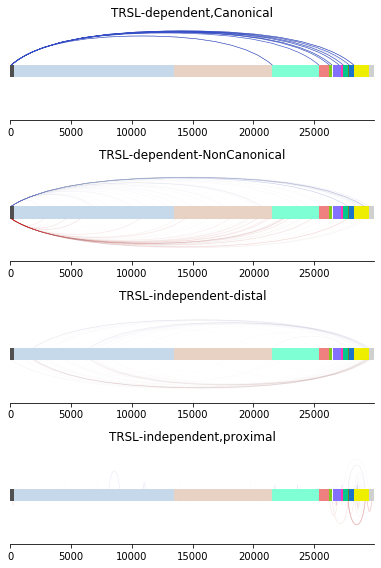

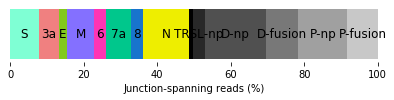

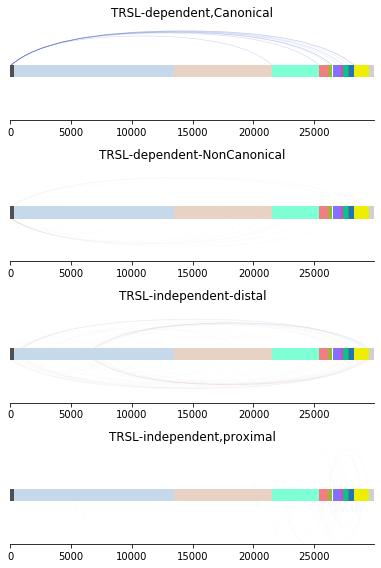

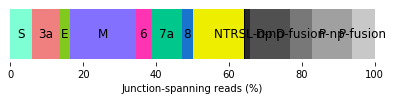

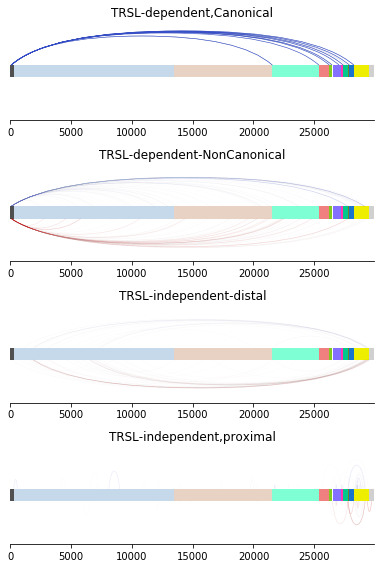

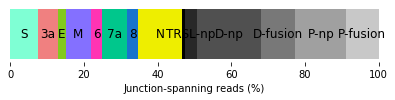

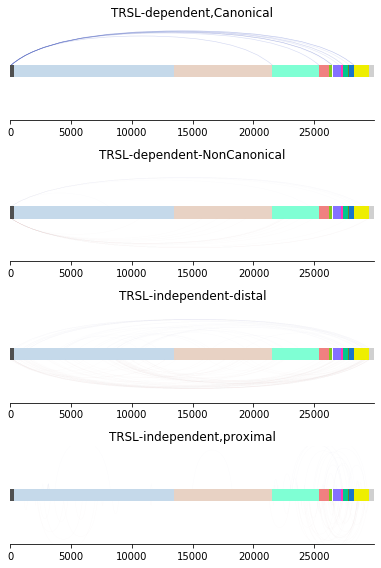

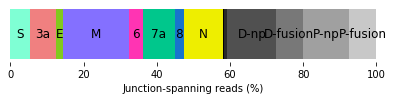

In [18]:
VB10_counts_p, VB10_summary_p = main(VB10.loc[VB10['strand'] == '+'], 'VB10(+)', '+', dir)
VB10_counts_n, VB10_summary_n = main(VB10.loc[VB10['strand'] == '-'], 'VB10(-)', '-', dir)

VC10_counts_p, VC10_summary_p = main(VC10.loc[VC10['strand'] == '+'], 'VC10(+)', '+', dir)
VC10_counts_n, VC10_summary_n = main(VC10.loc[VC10['strand'] == '-'], 'VC10(-)', '-', dir)



In [19]:
VB10_summary = pd.concat([VB10_summary_p, VB10_summary_n])
VB10_summary['sample'] = 'VB10'
VC10_summary = pd.concat([VC10_summary_p, VC10_summary_n])
VC10_summary['sample'] = 'VC10'
VB10_counts = pd.concat([VB10_counts_p, VB10_counts_n])
VB10_counts['pct'] = VB10_counts['count']/np.sum(VB10_counts['count'])
VB10_counts = VB10_counts.drop(columns = ['bottom', 'top'])
VC10_counts = pd.concat([VC10_counts_p, VC10_counts_n])
VC10_counts['pct'] = VC10_counts['count']/np.sum(VC10_counts['count'])
VC10_counts = VC10_counts.drop(columns = ['bottom', 'top'])

fusestarted      j5     j3 strand  count  startpos  productsize   sample     event chrom  \
8    73  27763      +     39        72            4  VB12(+)  73-27763   NaN   
24   73   2796      +     10        72           25  VB12(+)   73-2796   NaN   
37   73  20288      +      5        72            5  VB12(+)  73-20288   NaN   
202  73  28955      +      1        72          193  VB12(+)  73-28955   NaN   
203  73   2853      +      1        72            6  VB12(+)   73-2853   NaN   

    type name  start  end  startpos_byfusion          evtype evrelorf  evsize  
8    NaN  NaN    NaN  NaN              27762  frameshift,mid    ORF7b       4  
24   NaN  NaN    NaN  NaN               2795  frameshift,mid    ORF1a      25  
37   NaN  NaN    NaN  NaN              20287  frameshift,mid    ORF1b       5  
202  NaN  NaN    NaN  NaN              28954    N-term trunc        N     226  
203  NaN  NaN    NaN  NaN               2852  frameshift,mid    ORF1a       6  
56
remaining count: 478
fus

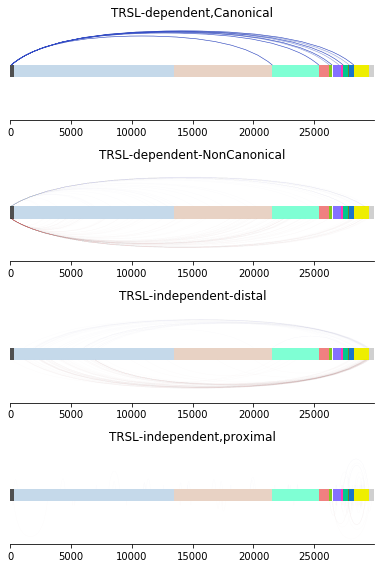

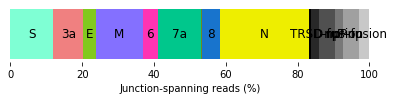

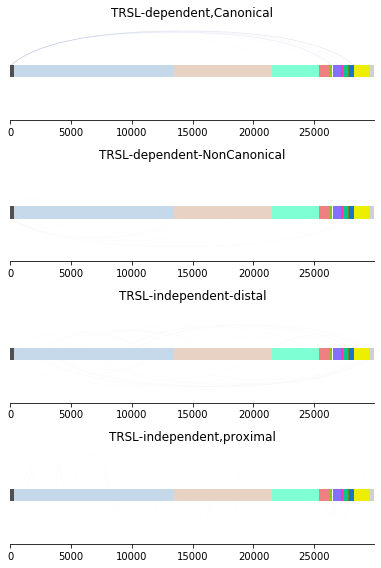

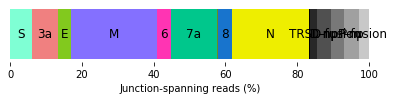

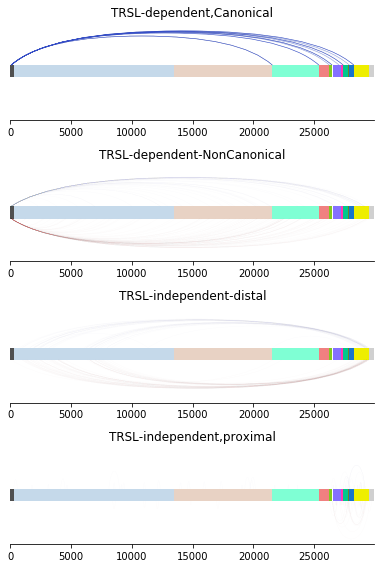

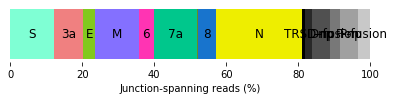

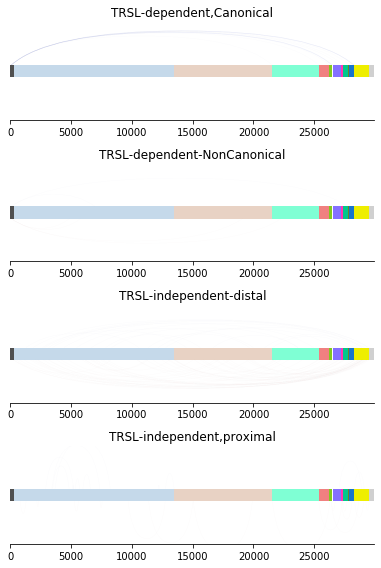

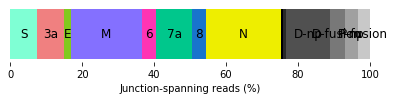

In [20]:

VB12_counts_p, VB12_summary_p = main(VB12.loc[VB12['strand'] == '+'], 'VB12(+)', '+', dir)
VB12_counts_n, VB12_summary_n = main(VB12.loc[VB12['strand'] == '-'], 'VB12(-)', '-', dir)

VC12_counts_p, VC12_summary_p = main(VC12.loc[VC12['strand'] == '+'], 'VC12(+)', '+', dir)
VC12_counts_n, VC12_summary_n = main(VC12.loc[VC12['strand'] == '-'], 'VC12(-)', '-', dir)


In [21]:
VB12_summary = pd.concat([VB12_summary_p, VB12_summary_n])
VB12_summary['sample'] = 'VB12'
VC12_summary = pd.concat([VC12_summary_p, VC12_summary_n])
VC12_summary['sample'] = 'VC12'
VB12_counts = pd.concat([VB12_counts_p, VB12_counts_n])
VB12_counts['pct'] = VB12_counts['count']/np.sum(VB12_counts['count'])
VB12_counts = VB12_counts.drop(columns = ['bottom', 'top'])
VC12_counts = pd.concat([VC12_counts_p, VC12_counts_n])
VC12_counts['pct'] = VC12_counts['count']/np.sum(VC12_counts['count'])
VC12_counts = VC12_counts.drop(columns = ['bottom', 'top'])

In [24]:
dir = 'sumarry'
#os.makedirs(dir)

VB10_counts.to_csv(os.path.join(dir, 'VB10_pct.csv'), index = 0)
VB10_summary.to_csv(os.path.join(dir, 'VB10_summary.csv'), index = 0)
VC10_counts.to_csv(os.path.join(dir, 'VC10_pct.csv'), index = 0)
VC10_summary.to_csv(os.path.join(dir, 'VC10_summary.csv'), index = 0)
VB12_counts.to_csv(os.path.join(dir, 'VB12_pct.csv'), index = 0)
VB12_summary.to_csv(os.path.join(dir, 'VB12_summary.csv'), index = 0)
VC12_counts.to_csv(os.path.join(dir, 'VC12_pct.csv'), index = 0)
VC12_summary.to_csv(os.path.join(dir, 'VC12_summary.csv'), index = 0)



In [26]:
import seaborn as sns

VB10_counts['group'] = 'V10'
VC10_counts['group'] = 'V10'
VB12_counts['group'] = 'V12'
VC12_counts['group'] = 'V12'
Allcounts = pd.concat([ VB10_counts, VC10_counts,  VB12_counts, VC12_counts])



In [57]:
dir = 'summary'
#os.makedirs(dir)
Allcounts.to_csv(os.path.join(dir, 'Allcounts_pct20200726.csv'), index = 0)

In [58]:
dir = 'summary'
Allcounts = pd.read_csv(os.path.join(dir, 'Allcounts_pct20200726.csv'), header = 0)

In [59]:
Allcounts.head()

,orf,count,order,color,pct,sample,strand,group
0,ORF1ab,0,0,#FFF8DC,0.000000,VB10(+),+,V10
1,S,6570,1,#7FFFD4,0.075195,VB10(+),+,V10
2,ORF3a,4738,2,#F08080,0.054227,VB10(+),+,V10
3,E,1825,3,#82c91e,0.020887,VB10(+),+,V10
4,M,6292,4,#8470FF,0.072013,VB10(+),+,V10


In [60]:
Allcounts.loc[Allcounts['group'] == 'V10','group'] = 'Virus'
Allcounts.loc[Allcounts['group'] == 'V12','group'] = 'Virus + RDV'

In [85]:
dir

'sumarry'

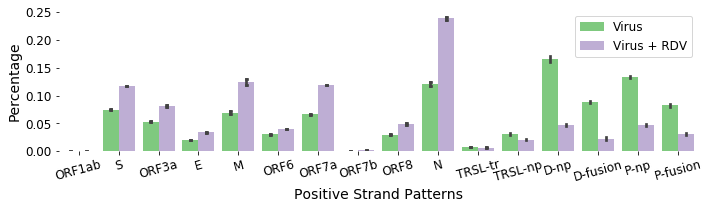

In [35]:
import seaborn as sns
Allcounts.index = Allcounts['orf']
#colors = ['lightcoral', 'indianred', 'red', 'palegreen', 'lightgreen', 'forestgreen', 'lightsteelblue', 'cornflowerblue', 'royalblue']
#colors=[  'lightpink','hotpink', 'deeppink','#FA8072',  '#FF6347', '#FF4500', 'lightsteelblue', 'cornflowerblue', 'royalblue']
colors = ['#EE5C42', '#CD4F39', '#8B3626', '#00EE76', '#00CD66','#008B45','#00E5EE', '#00C5CD', '#00868B']#  '#7A67EE', '#6959CD', '#473C8B']
plt.figure(figsize = (10, 3) )
ax = sns.barplot(x = 'orf', y = 'pct', hue = 'group', data = Allcounts[Allcounts['strand'] == '+'],
            palette = 'Accent',
            #palette = colors,
            order = Allcounts['orf'].unique(),  
            saturation = 100,
            ##edgecolor = 'w'
            capsize = 0.01
            )
plt.xlabel('Positive Strand Patterns', fontdict={ 'size'   : 14})
plt.ylabel('Percentage', fontdict={ 'size'   : 14})
plt.yticks( size = 12)
plt.xticks(rotation = 15, size = 12)
plt.legend(prop={ 'size'   : 12})

#sns.plotting_context({'font.size': 80 })
sns.despine(left = True, bottom = True)
plt.tight_layout()
plt.savefig(os.path.join(dir, 'Vero-allORF-bar(+).pdf'),dpi = 600)

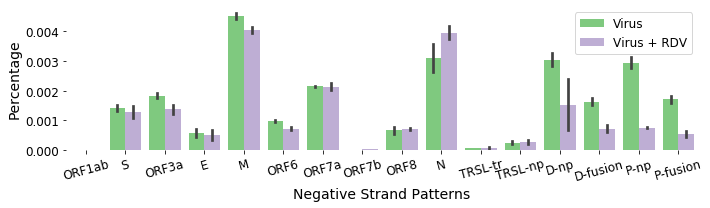

In [42]:
Allcounts.index = Allcounts['orf']
#colors = ['lightcoral', 'indianred', 'red', 'palegreen', 'lightgreen', 'forestgreen', 'lightsteelblue', 'cornflowerblue', 'royalblue']
#colors=[  'lightpink','hotpink', 'deeppink','#FA8072',  '#FF6347', '#FF4500', 'lightsteelblue', 'cornflowerblue', 'royalblue']
colors = ['#EE5C42', '#CD4F39', '#8B3626', '#00EE76', '#00CD66','#008B45','#00E5EE', '#00C5CD', '#00868B']#  '#7A67EE', '#6959CD', '#473C8B']
plt.figure(figsize = (10, 3) )
ax = sns.barplot(x = 'orf', y = 'pct', hue = 'group', data = Allcounts[Allcounts['strand'] == '-'],
            palette = 'Accent',
            #palette = colors,
            order = Allcounts['orf'].unique(),  
            saturation = 100,
            ##edgecolor = 'w'
            #capsize = 0.01,linewidth = 1
            )
plt.xlabel('Negative Strand Patterns', fontdict={ 'size'   : 14})
plt.ylabel('Percentage', fontdict={ 'size'   : 14})
plt.yticks( size = 12)
plt.xticks( rotation = 15,size = 12)
plt.legend(prop={ 'size'   : 12})

#sns.plotting_context({'font.size': 80 })
sns.despine(left = True, bottom = True)
plt.tight_layout()
plt.savefig(os.path.join(dir, 'Vero-allORF-bar(-).pdf'))

In [37]:
import scipy.stats as stats
def subpairs(Allcounts,  dir):
    Allcounts = Allcounts.copy()
    subcounts = Allcounts.loc[(Allcounts['group'] == 'V10')|(Allcounts['group'] == 'V12')]
    subcounts.loc[subcounts['group'] == 'V10','group'] = 'Virus'
    subcounts.loc[subcounts['group'] == 'V12','group'] = 'Virus + RDV'
    subcounts['normcount'] = 0
    subcounts['class'] = subcounts['sample'].str.strip('[(+)]').str.strip('[(-)]')
    for sample in subcounts['class'].unique():
        temp = subcounts.loc[subcounts['class'] == str(sample)]['count'].copy()
        subcounts.loc[subcounts['class'] == str(sample),'normcount'] = temp*1e6/temp.sum()
    subcounts['log2count'] = np.log2(subcounts['normcount'])
    #plt.figure(figsize = (8,5))
    font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 16}
    font1 = {'family' : 'Times New Roman',
    'weight' : 900,
    'size'   : 16}
    fig = plt.figure(figsize = (16,13))
    #plot_pos = np.append(range(441, 450),range(4410,4417))
    #plot_pos = range(421, 429)
    plot_pos = [[i,j] for i in range(4) for j in range(4)]
    sns.set(style="white")
    for gene, pos in zip(subcounts['orf'].drop(index = 'ORF7b').unique()[1:], plot_pos):
        ax = plt.subplot2grid((4,4),pos) 
        subpos = subcounts.loc[(subcounts['strand'] == '+') & (subcounts['orf'] == gene)]
        sns.pointplot(x='group', y = 'log2count',hue = 'orf',  color = 'black', data = subpos)
        ax.set_ylabel( 'Log2Count', font)
        ax.set_xlabel( 'Sample', font)
        ax.legend(prop = font1)
        ax1 = ax.twinx()
        subneg = subcounts.loc[(subcounts['strand'] == '-') & (subcounts['orf'] == gene)]
        sns.pointplot(x='group', y = 'log2count',  color = 'blue', linestyles = ['--']*subcounts['orf'].nunique(), data = subneg)
        posmax = subcounts.loc[(subcounts['strand'] == '+') & (subcounts['orf'] == gene)]['log2count'].max()
        posmin = subcounts.loc[(subcounts['strand'] == '+') & (subcounts['orf'] == gene)]['log2count'].min()
        negmax = subcounts.loc[(subcounts['strand'] == '-') & (subcounts['orf'] == gene)]['log2count'].max()
        negmin = subcounts.loc[(subcounts['strand'] == '-') & (subcounts['orf'] == gene)]['log2count'].min()
        diff = max(int(posmax)-int(posmin), int(negmax) - int(negmin))
        head = max(posmax, negmax)
        tail = min(posmin, negmin)
        #stat, p = stats.levene(subpos['log2count'], subneg['log2count'])
        #F-test
        #F = np.var(subpos['log2count']) / np.var(subneg['log2count'])
        #df1 = len(subpos['log2count']) - 1
        #df2 = len(subneg['log2count']) - 1
        #p = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
        #stat, p = stats.spearmanr(subpos['log2count'], subneg['log2count'])
        stat, p = stats.pearsonr(subpos['log2count'], subneg['log2count'])
        
        #stat, p = stats.kendalltau(subpos['log2count'], subneg['log2count'])
        #stat, p = stats.kendalltau(subcounts.loc[(subcounts['orf'] == gene)&(subcounts['group'] == 'V10')]['log2count'], 
         #                          subcounts.loc[(subcounts['orf'] == gene)&(subcounts['group'] == 'V12')]['log2count'])
        print(stat, p)
        #stat, p = stats.ttest_ind(subpos['log2count'], subneg['log2count'], equal_var = False)
        #stat, p = stats.ks_2samp(subpos['log2count'], subneg['log2count'])
        #stat, p = stats.wilcoxon(subpos['log2count'], subneg['log2count'], correction = True, alternative = 'greater')
        #ax.text(0, int(posmax) - diff -1 , 'p = %.3f'%p, font)
        #ax1.text(0, int(negmax)-diff +0.5, '-log10(p) = %.2f'%-np.log10(p), font)
        
        
        #ax1.text(0, int(negmax)-diff +0.8, 'cor = %.3f'%stat, font)
        #ax1.text(0, int(negmax)-diff +0.5, 'p = %.3f'%p, font)
        ax.set_yticks(np.arange(int(posmax)-diff,int(posmax)+1.5, 1))
        ax1.set_yticks(np.arange(int(negmax)-diff, int(negmax)+1.5, 1))
        ax1.set_ylabel( 'Log2Count', font,color = 'blue')
        
    #plt.legend(prop = font1)
    #plt.xticks(family = 'Times New Roman',fontsize = 10)
    #plt.yticks(family = 'Times New Roman', fontsize = 10)
    #plt.xlabel('Sample', font)
    #plt.ylabel('Log2Count', font)
    plt.tight_layout()
    plt.savefig(os.path.join(dir, 'sns_pointplot_orf_sub_Pearson_norm.pdf'),dpi = 600)
   
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


-0.39698841282189185 0.6030115871781081
-0.8799318313847113 0.12006816861528868
-0.22279787867313203 0.777202121326868
-0.851270491262288 0.14872950873771196
-0.9343193592920243 0.06568064070797575
-0.12575731188162464 0.8742426881183754
0.2933532853119438 0.7066467146880562
0.7738825514954553 0.22611744850454474
-0.008447939556610912 0.9915520604433891
-0.11179896230967301 0.888201037690327
0.717987587995107 0.282012412004893
0.9895897463737731 0.01041025362622694
0.9951270107961439 0.004872989203856148
0.9960080057021865 0.003991994297813495


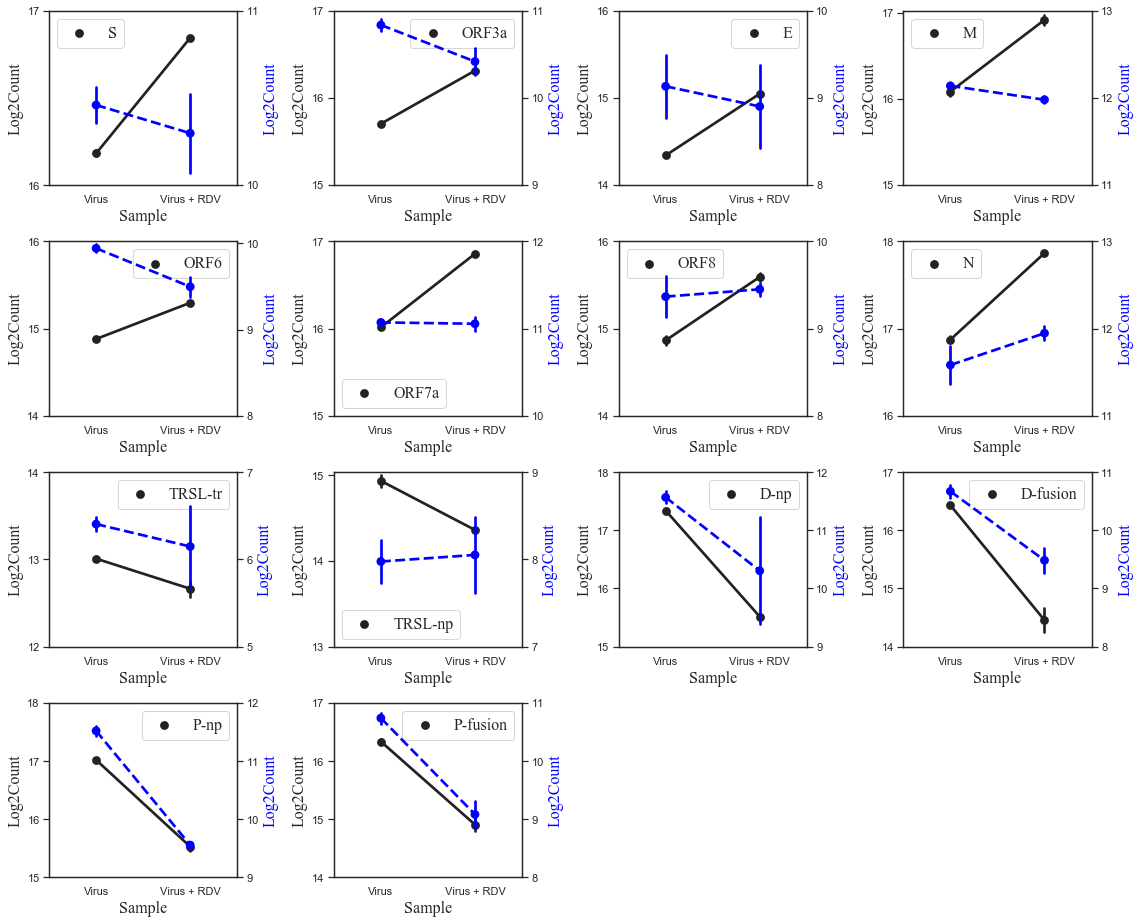

In [38]:
subpairs(Allcounts, dir)

In [28]:
import scipy.stats as stats
import seaborn as sns
def subpairs(Allcounts,  dir):
    Allcounts = Allcounts.copy()
    subcounts = Allcounts.loc[(Allcounts['group'] == 'V10')|(Allcounts['group'] == 'V12')]
    subcounts.loc[subcounts['group'] == 'V10','group'] = 'Virus'
    subcounts.loc[subcounts['group'] == 'V12','group'] = 'Virus + RDV'
    subcounts['normcount'] = 0
    subcounts['class'] = subcounts['sample'].str.strip('[(+)]').str.strip('[(-)]')
    for sample in subcounts['class'].unique():
        temp = subcounts.loc[subcounts['class'] == str(sample)]['count'].copy()
        subcounts.loc[subcounts['class'] == str(sample),'normcount'] = temp*1e6/temp.sum()
    subcounts['log2count'] = np.log2(subcounts['normcount'])
    #plt.figure(figsize = (8,5))
    font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 16}
    font1 = {'family' : 'Times New Roman',
    'weight' : 900,
    'size'   : 16}
    fig = plt.figure(figsize = (16,13))
    #plot_pos = np.append(range(441, 450),range(4410,4417))
    #plot_pos = range(421, 429)
    plot_pos = [[i,j] for i in range(4) for j in range(4)]
    sns.set(style="white")
    df = pd.DataFrame([['orfs','stat','p']])
    cordf = pd.DataFrame([['orfs','stat','p']])
    for gene, pos in zip(subcounts['orf'].drop(index = 'ORF7b').unique()[1:], plot_pos):
        ax = plt.subplot2grid((4,4),pos) 
        subpos = subcounts.loc[(subcounts['strand'] == '+') & (subcounts['orf'] == gene)]
        sns.pointplot(x='group', y = 'log2count',hue = 'orf',  color = 'black', data = subpos)
        ax.set_ylabel( 'Log2Count', font)
        ax.set_xlabel( 'Sample', font)
        ax.legend(prop = font1)
        ax1 = ax.twinx()
        subneg = subcounts.loc[(subcounts['strand'] == '-') & (subcounts['orf'] == gene)]
        sns.pointplot(x='group', y = 'log2count',  color = 'blue', linestyles = ['--']*subcounts['orf'].nunique(), data = subneg)
        posmax = subcounts.loc[(subcounts['strand'] == '+') & (subcounts['orf'] == gene)]['log2count'].max()
        posmin = subcounts.loc[(subcounts['strand'] == '+') & (subcounts['orf'] == gene)]['log2count'].min()
        negmax = subcounts.loc[(subcounts['strand'] == '-') & (subcounts['orf'] == gene)]['log2count'].max()
        negmin = subcounts.loc[(subcounts['strand'] == '-') & (subcounts['orf'] == gene)]['log2count'].min()
        diff = max(int(posmax)-int(posmin), int(negmax) - int(negmin))
        head = max(posmax, negmax)
        tail = min(posmin, negmin)
        stat, p = stats.levene(subpos['log2count'], subneg['log2count'],center='mean')
        df = df.append([[gene, stat,p]])
        #F-test
        #F = np.var(subpos['log2count']) / np.var(subneg['log2count'])
        #df1 = len(subpos['log2count']) - 1
        #df2 = len(subneg['log2count']) - 1
        #p = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
        #stat, p = stats.spearmanr(subpos['log2count'], subneg['log2count'])
        stat, p = stats.pearsonr(subpos['log2count'], subneg['log2count'])
        cordf = cordf.append([[gene, stat, p]])
        #stat, p = stats.kendalltau(subpos['log2count'], subneg['log2count'])
        #stat, p = stats.kendalltau(subcounts.loc[(subcounts['orf'] == gene)&(subcounts['group'] == 'V10')]['log2count'], 
         #                          subcounts.loc[(subcounts['orf'] == gene)&(subcounts['group'] == 'V12')]['log2count'])
        print(stat, p)
        #stat, p = stats.ttest_ind(subpos['log2count'], subneg['log2count'], equal_var = False)
        #stat, p = stats.ks_2samp(subpos['log2count'], subneg['log2count'])
        #stat, p = stats.wilcoxon(subpos['log2count'], subneg['log2count'], correction = True, alternative = 'greater')
        #ax.text(0, int(posmax) - diff -1 , 'p = %.3f'%p, font)
        #ax1.text(0, int(negmax)-diff +0.5, '-log10(p) = %.2f'%-np.log10(p), font)
        
        
        #ax1.text(0, int(negmax)-diff +0.8, 'cor = %.3f'%stat, font)
        #ax1.text(0, int(negmax)-diff +0.5, 'p = %.3f'%p, font)
        ax.set_yticks(np.arange(int(posmax)-diff,int(posmax)+1.5, 1))
        ax1.set_yticks(np.arange(int(negmax)-diff, int(negmax)+1.5, 1))
        ax1.set_ylabel( 'Log2Count', font,color = 'blue')
    
    df.to_csv(os.path.join(dir, 'Levene_pvalues.csv'),index=0,header=0)
    cordf.to_csv(os.path.join(dir, 'PearsonCor_pvalues.csv'),index=0,header=0)
    #plt.legend(prop = font1)
    #plt.xticks(family = 'Times New Roman',fontsize = 10)
    #plt.yticks(family = 'Times New Roman', fontsize = 10)
    #plt.xlabel('Sample', font)
    #plt.ylabel('Log2Count', font)
    plt.tight_layout()
    plt.savefig(os.path.join(dir, 'sns_pointplot_orf_sub_Pearson_norm.pdf'),dpi = 600)
   
    plt.show()

In [22]:
len(Allcounts)

126

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


-0.39698841282189185 0.6030115871781081
-0.8799318313847113 0.12006816861528868
-0.22279787867313203 0.777202121326868
-0.851270491262288 0.14872950873771196
-0.9343193592920243 0.06568064070797575
-0.12575731188162464 0.8742426881183754
0.2933532853119438 0.7066467146880562
0.7738825514954553 0.22611744850454474
-0.008447939556610912 0.9915520604433891
-0.11179896230967301 0.888201037690327
0.717987587995107 0.282012412004893
0.9895897463737731 0.01041025362622694
0.9951270107961439 0.004872989203856148
0.9960080057021865 0.003991994297813495


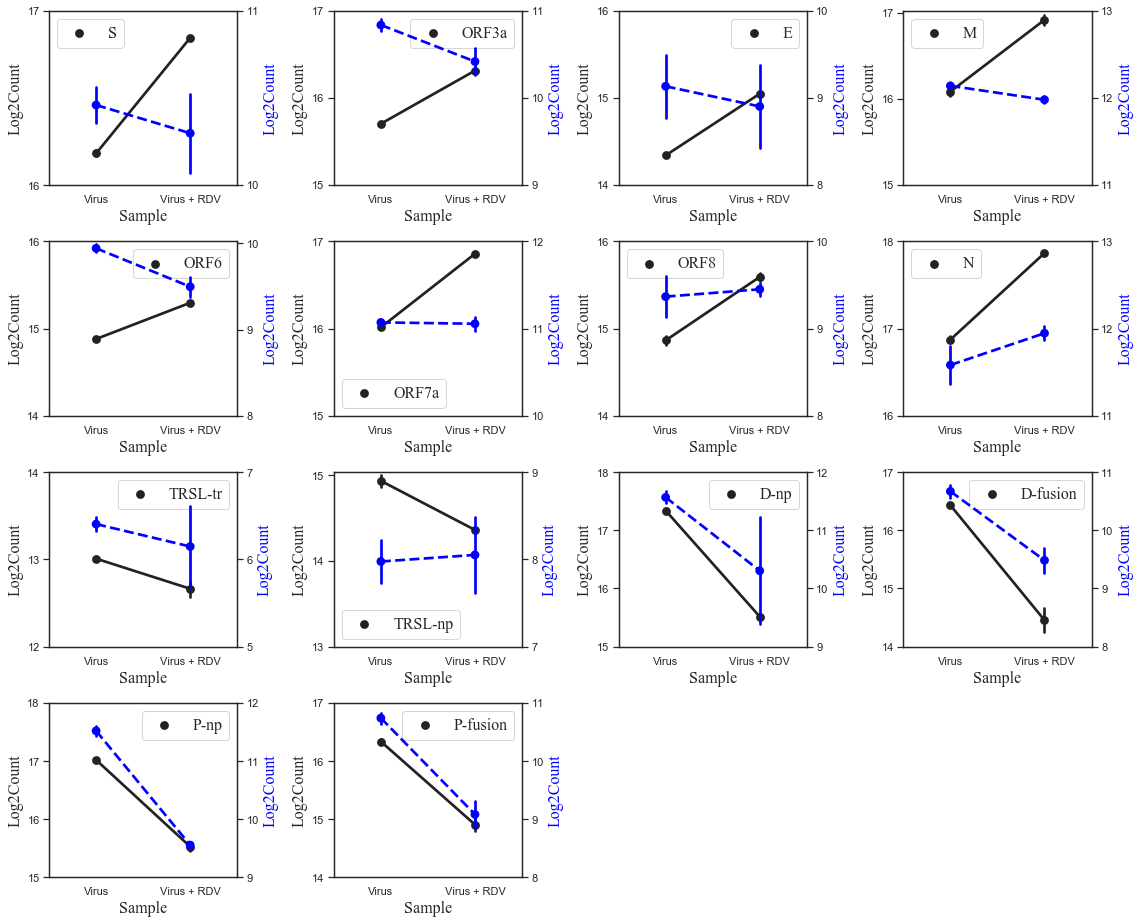

In [29]:
Allcounts.index = Allcounts['orf']
subpairs(Allcounts, dir)

In [61]:
VB10_summary.head()

NameError: name 'VB10_summary' is not defined

In [50]:
import scipy.stats as stats
def subpairs(Allcounts,  dir):
    Allcounts = Allcounts.copy()
    subcounts = Allcounts.loc[(Allcounts['group'] == 'V10')|(Allcounts['group'] == 'V12')]
    subcounts.loc[subcounts['group'] == 'V10','group'] = 'Virus'
    subcounts.loc[subcounts['group'] == 'V12','group'] = 'Virus + RDV'
    subcounts['normcount'] = 0
    subcounts['class'] = subcounts['sample'].str.strip('[(+)]').str.strip('[(-)]')
    for sample in subcounts['class'].unique():
        temp = subcounts.loc[subcounts['class'] == str(sample)]['count'].copy()
        subcounts.loc[subcounts['class'] == str(sample),'normcount'] = temp*1e6/temp.sum()
    subcounts['log2count'] = np.log2(subcounts['normcount'])
    #plt.figure(figsize = (8,5))
    font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 16}
    font1 = {'family' : 'Times New Roman',
    'weight' : 900,
    'size'   : 16}
    fig = plt.figure(figsize = (16,13))
    #plot_pos = np.append(range(441, 450),range(4410,4417))
    #plot_pos = range(421, 429)
    plot_pos = [[i,j] for i in range(4) for j in range(4)]
    sns.set(style="white")
    for gene, pos in zip(subcounts['orf'].drop(index = 'ORF7b').unique()[1:], plot_pos):
        ax = plt.subplot2grid((4,4),pos) 
        subpos = subcounts.loc[(subcounts['strand'] == '+') & (subcounts['orf'] == gene)]
        sns.pointplot(x='group', y = 'log2count',hue = 'orf',  color = 'black', data = subpos)
        ax.set_ylabel( 'Log2Count', font)
        ax.set_xlabel( 'Sample', font)
        ax.legend(prop = font1)
        #ax1 = ax.twinx()
        subneg = subcounts.loc[(subcounts['strand'] == '-') & (subcounts['orf'] == gene)]
        sns.pointplot(x='group', y = 'log2count',  color = 'blue', linestyles = ['--']*subcounts['orf'].nunique(), data = subneg)
        posmax = subcounts.loc[(subcounts['strand'] == '+') & (subcounts['orf'] == gene)]['log2count'].max()
        posmin = subcounts.loc[(subcounts['strand'] == '+') & (subcounts['orf'] == gene)]['log2count'].min()
        negmax = subcounts.loc[(subcounts['strand'] == '-') & (subcounts['orf'] == gene)]['log2count'].max()
        negmin = subcounts.loc[(subcounts['strand'] == '-') & (subcounts['orf'] == gene)]['log2count'].min()
        diff = max(int(posmax)-int(posmin), int(negmax) - int(negmin))
        head = max(posmax, negmax)
        tail = min(posmin, negmin)
        stat, p = stats.pearsonr(subpos['log2count'], subneg['log2count'])
        
        print(stat, p)
        #ax.set_yticks(np.arange(int(posmax)-diff,int(posmax)+1.5, 1))
        #ax1.set_yticks(np.arange(int(negmax)-diff, int(negmax)+1.5, 1))
        #ax1.set_ylabel( 'Log2Count', font,color = 'blue')
        
    plt.tight_layout()
    #plt.savefig(os.path.join(dir, 'sns_pointplot_orf_sub_Pearson_norm.pdf'),dpi = 600)
   
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


-0.39698841282189185 0.6030115871781081
-0.8799318313847113 0.12006816861528868
-0.22279787867313203 0.777202121326868
-0.851270491262288 0.14872950873771196
-0.9343193592920243 0.06568064070797575
-0.12575731188162464 0.8742426881183754
0.2933532853119438 0.7066467146880562
0.7738825514954553 0.22611744850454474
-0.008447939556610912 0.9915520604433891
-0.11179896230967301 0.888201037690327
0.717987587995107 0.282012412004893
0.9895897463737731 0.01041025362622694
0.9951270107961439 0.004872989203856148
0.9960080057021865 0.003991994297813495


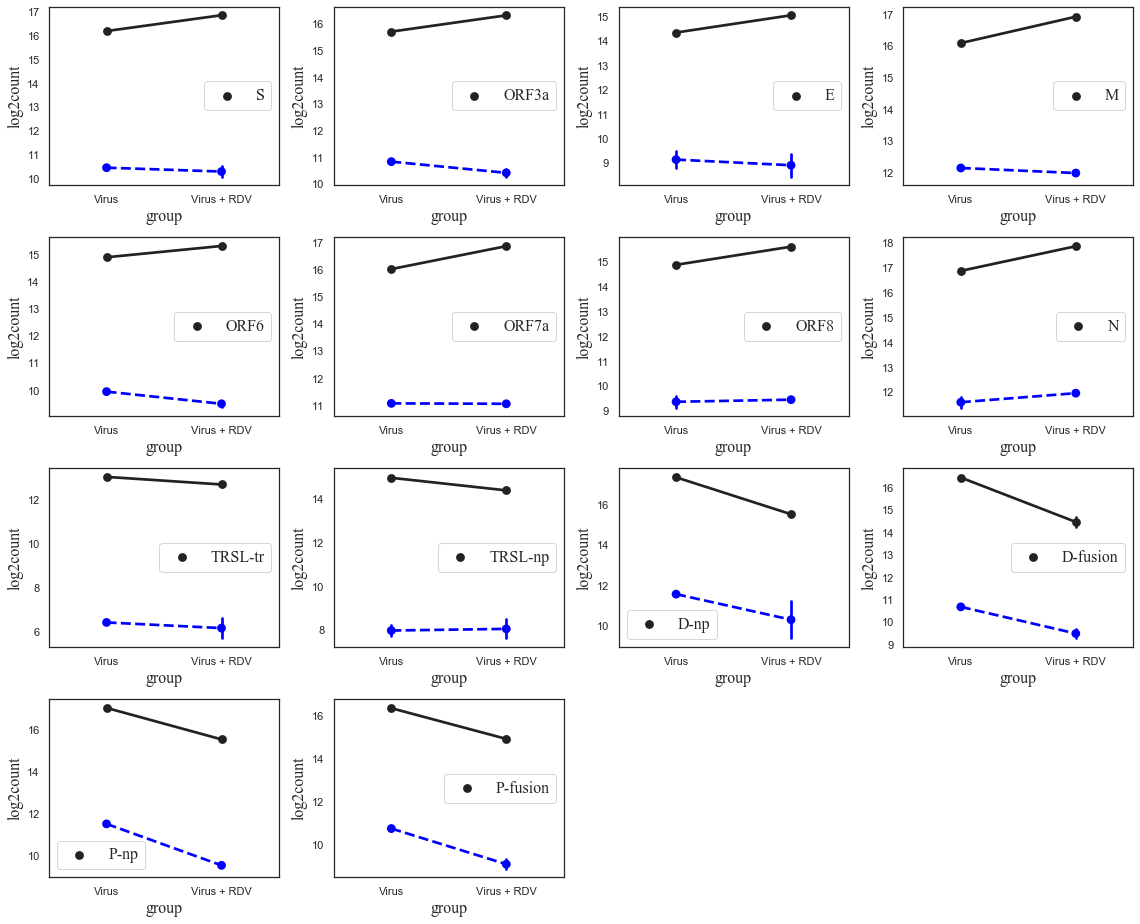

In [51]:
subpairs(Allcounts, dir)

In [43]:
VB10 = pd.read_csv(os.path.join(dir,'VB10_summary.csv'),header = 0)
VC10 = pd.read_csv(os.path.join(dir, 'VC10_summary.csv'), header = 0)
VB12 = pd.read_csv(os.path.join(dir, 'VB12_summary.csv'), header = 0)
VC12 = pd.read_csv(os.path.join(dir, 'VC12_summary.csv'), header = 0)


In [96]:
VB10.head()

,j5,j3,strand,count,startpos,productsize,sample,event,pattern,chrom,type,name,start,end,group
0,67,28257,+,10677,28276,419,VB10,67-28257,TRSL-can,chrSCV,CDS,N,28276.0,29536.0,Virus
1,68,21554,+,6481,21565,1273,VB10,68-21554,TRSL-can,chrSCV,CDS,S,21565.0,25387.0,Virus
2,67,26470,+,6230,26525,222,VB10,67-26470,TRSL-can,chrSCV,CDS,M,26525.0,27194.0,Virus
3,69,27387,+,5809,27396,121,VB10,69-27387,TRSL-can,chrSCV,CDS,ORF7a,27396.0,27762.0,Virus
4,68,25383,+,4736,25395,275,VB10,68-25383,TRSL-can,chrSCV,CDS,ORF3a,25395.0,26223.0,Virus


In [46]:
VB10['group'] = 'Virus'
VC10['group'] = 'Virus'
VB12['group'] = 'Virus + RDV'
VC12['group'] = 'Virus + RDV'
allcounts = pd.concat([VB10,VC10,VB12,VC12])

In [50]:
allcounts = allcounts.sort_values(by = 'count', ascending = False)

In [95]:
covseq[(72-15):(72+15)]

'AGATCTGTTCTCTAAACGAACTTTAAAATC'

In [58]:
negativetop.head()

,event,strand,pattern,name,group
28690,67-26470,-,TRSL-can,M,Virus
28691,67-28257,-,TRSL-can,N,Virus
31729,69-27387,-,TRSL-can,ORF7a,Virus
28693,68-25383,-,TRSL-can,ORF3a,Virus
28694,68-21554,-,TRSL-can,S,Virus


In [59]:
def shareseg(ref, seq, window = None):
    L = len(seq)
    motif = []
    if not window:
        for i in range(L, 2, -1):
            sheet = []
            start,end = [],[]
            for j in range(L-i+1):
                pattern = seq[j:(j+i)]
                sheet.append(ref.find(pattern))
            if sum(sheet) > -(L-i+1):
                motif = [ref[int(sheet[k]):int(sheet[k])+i] for k in range(len(sheet)) if int(sheet[k]) >= 0]
                start = [k for k in range(len(sheet)) if int(sheet[k]) >= 0]
                end = [k+i for k in range(len(sheet)) if int(sheet[k]) >= 0]
                return([motif[0],start[0], end[0],motif])
                break
    return([motif,None,None,motif])


In [81]:
w = 15
allcounts['j5_seq'] =[covseq[(i-w):(i+w)] for i in allcounts['j5']]
allcounts['j3_seq'] =[covseq[(i-w):(i+w)] for i in allcounts['j3']]
allcounts['target'] = [shareseg(i,j)[0] for i,j in allcounts[['j5_seq', 'j3_seq']].values]
allcounts['coseq-start'] = [shareseg(i,j)[1] for i,j in allcounts[['j5_seq', 'j3_seq']].values]
allcounts['coseq-end'] = [shareseg(i,j)[2] for i,j in allcounts[['j5_seq', 'j3_seq']].values]
allcounts['nchar'] = [len(i) for i in allcounts['target']]


In [85]:
 negatives = allcounts.loc[(allcounts['strand'] == '-')&(allcounts['group'] == 'Virus'), ['event','strand','pattern','name','group','j5_seq','j3_seq','target','nchar']].drop_duplicates()

In [51]:
allcounts.loc[~allcounts['name'].isna(), ['event','name','target','nchar']].drop_duplicates()[0:11]

NameError: name 'allcounts' is not defined

In [62]:
dir = 'sumarry'
#os.makedirs(dir)

VB10_summary = pd.read_csv(os.path.join(dir, 'VB10_summary.csv'), header = 0)
VC10_summary = pd.read_csv(os.path.join(dir, 'VC10_summary.csv'), header = 0)
VB12_summary = pd.read_csv(os.path.join(dir, 'VB12_summary.csv'), header = 0)
VC12_summary = pd.read_csv(os.path.join(dir, 'VC12_summary.csv'), header = 0)


In [64]:
allcounts = pd.concat([VB10_summary, VC10_summary, VB12_summary, VC12_summary])

In [70]:
w = 15
allcounts['j5_seq'] =[covseq[(i-w):(i+w)] for i in allcounts['j5']]
allcounts['j3_seq'] =[covseq[(i-w):(i+w)] for i in allcounts['j3']]
allcounts['target'] = [shareseg(i,j)[0] for i,j in allcounts[['j5_seq', 'j3_seq']].values]
allcounts['coseq-start'] = [shareseg(i,j)[1] for i,j in allcounts[['j5_seq', 'j3_seq']].values]
allcounts['coseq-end'] = [shareseg(i,j)[2] for i,j in allcounts[['j5_seq', 'j3_seq']].values]
allcounts['targets'] = [shareseg(i,j)[3] for i,j in allcounts[['j5_seq', 'j3_seq']].values]
allcounts['nchar'] = [len(i) for i in allcounts['target']]


In [71]:
def shareseg(ref, seq, window = None):
    L = len(seq)
    motif = []
    if not window:
        for i in range(L, 2, -1):
            sheet = []
            start,end = [],[]
            for j in range(L-i+1):
                pattern = seq[j:(j+i)]
                sheet.append(ref.find(pattern))
            if sum(sheet) > -(L-i+1):
                motif = [ref[int(sheet[k]):int(sheet[k])+i] for k in range(len(sheet)) if int(sheet[k]) >= 0]
                start = [k for k in range(len(sheet)) if int(sheet[k]) >= 0]
                end = [k+i for k in range(len(sheet)) if int(sheet[k]) >= 0]
                return([motif[0],start[0], end[0],motif])
                break
    return([motif,None,None,motif])


In [72]:
allcounts['target'] = [shareseg(i,j)[0] for i,j in allcounts[['j5_seq', 'j3_seq']].values]
allcounts['coseq-start'] = [shareseg(i,j)[1] for i,j in allcounts[['j5_seq', 'j3_seq']].values]
allcounts['coseq-end'] = [shareseg(i,j)[2] for i,j in allcounts[['j5_seq', 'j3_seq']].values]

allcounts.head()

,j5,j3,strand,count,startpos,productsize,sample,event,pattern,chrom,...,name,start,end,j5_seq,j3_seq,target,coseq-start,coseq-end,targets,nchar
0,67,28257,+,10677,28276,419,VB10,67-28257,TRSL-can,chrSCV,...,N,28276.0,29536.0,CTTGTAGATCTGTTCTCTAAACGAACTTTA,TTGTTTTAGATTTCATCTAAACGAACAAAC,TCTAAACGAAC,15.0,26.0,[TCTAAACGAAC],11
1,68,21554,+,6481,21565,1273,VB10,68-21554,TRSL-can,chrSCV,...,S,21565.0,25387.0,TTGTAGATCTGTTCTCTAAACGAACTTTAA,TGTTCTTGTTAACAACTAAACGAACAATGT,CTAAACGAAC,15.0,25.0,[CTAAACGAAC],10
2,67,26470,+,6230,26525,222,VB10,67-26470,TRSL-can,chrSCV,...,M,26525.0,27194.0,CTTGTAGATCTGTTCTCTAAACGAACTTTA,TTCCTGATCTTCTGGTCTAAACGAACTAAA,TCTAAACGAACT,15.0,27.0,[TCTAAACGAACT],12
3,69,27387,+,5809,27396,121,VB10,69-27387,TRSL-can,chrSCV,...,ORF7a,27396.0,27762.0,TGTAGATCTGTTCTCTAAACGAACTTTAAA,CCAATGGAGATTGATTAAACGAACATGAAA,TAAACGAAC,15.0,24.0,[TAAACGAAC],9
4,68,25383,+,4736,25395,275,VB10,68-25383,TRSL-can,chrSCV,...,ORF3a,25395.0,26223.0,TTGTAGATCTGTTCTCTAAACGAACTTTAA,CAAATTACATTACACATAAACGAACTTATG,TAAACGAACTT,16.0,27.0,[TAAACGAACTT],11


In [79]:
allcounts.columns

Index(['j5', 'j3', 'strand', 'count', 'startpos', 'productsize', 'sample',
       'event', 'pattern', 'chrom', 'type', 'name', 'start', 'end', 'j5_seq',
       'j3_seq', 'target', 'coseq-start', 'coseq-end', 'targets', 'nchar'],
      dtype='object')

In [74]:
font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16}
font1 = {'weight' : 'normal',
'size'   : 12}

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


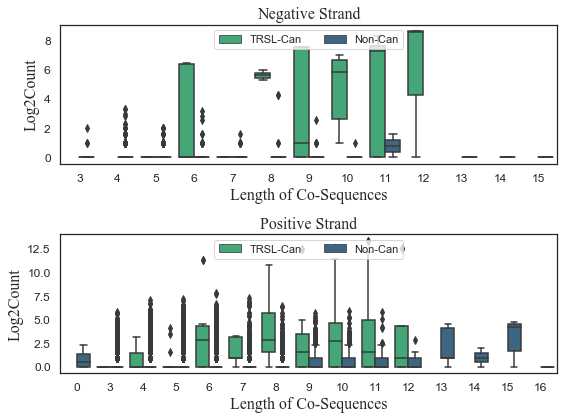

In [82]:
alltypes = allcounts
plt.figure(figsize = (8,6))
#aggdata = alldata.groupby(['pattern']).agg({'count':'mean'}).sort_values(by='count',ascending = False)
#order = aggdata.index
alltypes['Log2Count'] = np.log2(alltypes['count'])
alltypes['Class'] = 'TRSL-Can'
alltypes.loc[alltypes['pattern'] != 'TRSL-can','Class'] = 'Non-Can'
order = ['TRSL-Can', 'Non-Can']
alltypes = alltypes.sort_values(by='Class',ascending = False)
alltypes['group'] = 'Virus'
alltypes['group'].loc[(alltypes['sample'] == 'VB12')|(alltypes['sample'] == 'VC12')] = 'Virus + RDV'
plt.subplot(211)
sns.boxplot(x = 'nchar', y ='Log2Count', hue = 'Class',  palette = 'viridis_r',dodge = True, data = alltypes.loc[(alltypes['strand'] == '-' )&(alltypes['group'] == 'Virus')])
#sns.swarmplot(y = 'pattern', x ='nchar', data = VA10.loc[VA10['nchar'] >3],color = '.25')
plt.xticks(rotation = 0,fontsize = 12)
plt.yticks( fontsize = 12)
plt.ylabel('Log2Count', font)
plt.title('Negative Strand', font)
plt.xlabel('Length of Co-Sequences',font)
plt.legend(loc='upper center', ncol =7)
plt.subplot(212)
sns.boxplot(x = 'nchar', y ='Log2Count', hue = 'Class',  palette = 'viridis_r', data = alltypes.loc[(alltypes['strand'] == '+' )&(alltypes['group'] == 'Virus')])
plt.xticks(rotation = 0,fontsize = 12)
plt.yticks( fontsize = 12)
plt.ylabel('Log2Count', font)
plt.title('Positive Strand', font)
plt.xlabel('Length of Co-Sequences',font)
plt.legend(loc='upper center', ncol =7)

plt.tight_layout()
plt.savefig(os.path.join(dir, 'boxplot_patternVScount_V10_win30_merged.pdf'),dpi = 600)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


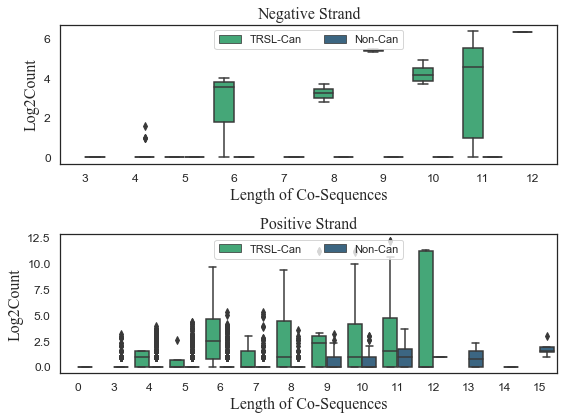

In [83]:
alltypes = allcounts
plt.figure(figsize = (8,6))
#aggdata = alldata.groupby(['pattern']).agg({'count':'mean'}).sort_values(by='count',ascending = False)
#order = aggdata.index
alltypes['Log2Count'] = np.log2(alltypes['count'])
alltypes['Class'] = 'TRSL-Can'
alltypes.loc[alltypes['pattern'] != 'TRSL-can','Class'] = 'Non-Can'
order = ['TRSL-Can', 'Non-Can']
alltypes = alltypes.sort_values(by='Class',ascending = False)
alltypes['group'] = 'Virus'
alltypes['group'].loc[(alltypes['sample'] == 'VB12')|(alltypes['sample'] == 'VC12')] = 'Virus + RDV'
plt.subplot(211)
sns.boxplot(x = 'nchar', y ='Log2Count', hue = 'Class',  palette = 'viridis_r',dodge = True, data = alltypes.loc[(alltypes['strand'] == '-' )&(alltypes['group'] == 'Virus + RDV')])
#sns.swarmplot(y = 'pattern', x ='nchar', data = VA10.loc[VA10['nchar'] >3],color = '.25')
plt.xticks(rotation = 0,fontsize = 12)
plt.yticks( fontsize = 12)
plt.ylabel('Log2Count', font)
plt.title('Negative Strand', font)
plt.xlabel('Length of Co-Sequences',font)
plt.legend(loc='upper center', ncol =7)
plt.subplot(212)
sns.boxplot(x = 'nchar', y ='Log2Count', hue = 'Class',  palette = 'viridis_r', data = alltypes.loc[(alltypes['strand'] == '+' )&(alltypes['group'] == 'Virus + RDV')])
plt.xticks(rotation = 0,fontsize = 12)
plt.yticks( fontsize = 12)
plt.ylabel('Log2Count', font)
plt.title('Positive Strand', font)
plt.xlabel('Length of Co-Sequences',font)
plt.legend(loc='upper center', ncol =7)

plt.tight_layout()
plt.savefig(os.path.join(dir, 'boxplot_patternVScount_V12_win30_merged.pdf'),dpi = 600)

In [84]:
dir

'sumarry'

In [143]:
allcounts[allcounts['event'] == '74-27764']

,j5,j3,strand,count,startpos,productsize,sample,event,pattern,chrom,...,start,end,group,j5_seq,j3_seq,target,coseq-start,coseq-end,targets,nchar
9,74,27764,+,162,27827,20,VC10,74-27764,TRSL-noncan-inframe,NaN,...,NaN,NaN,Virus,ATCTGTTCTCTAAACGAACTTTAAAATCTG,AAAGACAGAATGATTGAACTTTCATTAATT,GAACTTT,15.0,22.0,[GAACTTT],7
11,74,27764,+,129,27827,20,VB10,74-27764,TRSL-noncan-inframe,NaN,...,NaN,NaN,Virus,ATCTGTTCTCTAAACGAACTTTAAAATCTG,AAAGACAGAATGATTGAACTTTCATTAATT,GAACTTT,15.0,22.0,[GAACTTT],7
9,74,27764,+,34,27827,20,VB12,74-27764,TRSL-noncan-inframe,NaN,...,NaN,NaN,Virus + RDV,ATCTGTTCTCTAAACGAACTTTAAAATCTG,AAAGACAGAATGATTGAACTTTCATTAATT,GAACTTT,15.0,22.0,[GAACTTT],7
10,74,27764,+,29,27827,20,VC12,74-27764,TRSL-noncan-inframe,NaN,...,NaN,NaN,Virus + RDV,ATCTGTTCTCTAAACGAACTTTAAAATCTG,AAAGACAGAATGATTGAACTTTCATTAATT,GAACTTT,15.0,22.0,[GAACTTT],7
31757,74,27764,-,2,27827,20,VC10,74-27764,TRSL-noncan-inframe,NaN,...,NaN,NaN,Virus,ATCTGTTCTCTAAACGAACTTTAAAATCTG,AAAGACAGAATGATTGAACTTTCATTAATT,GAACTTT,15.0,22.0,[GAACTTT],7
2549,74,27764,-,1,27827,20,VC12,74-27764,TRSL-noncan-inframe,NaN,...,NaN,NaN,Virus + RDV,ATCTGTTCTCTAAACGAACTTTAAAATCTG,AAAGACAGAATGATTGAACTTTCATTAATT,GAACTTT,15.0,22.0,[GAACTTT],7
28830,74,27764,-,1,27827,20,VB10,74-27764,TRSL-noncan-inframe,NaN,...,NaN,NaN,Virus,ATCTGTTCTCTAAACGAACTTTAAAATCTG,AAAGACAGAATGATTGAACTTTCATTAATT,GAACTTT,15.0,22.0,[GAACTTT],7


In [144]:
allcounts[allcounts['event'] == '6496-19809']

,j5,j3,strand,count,startpos,productsize,sample,event,pattern,chrom,...,start,end,group,j5_seq,j3_seq,target,coseq-start,coseq-end,targets,nchar


In [145]:
allcounts[allcounts['event'] == '71-29156']

,j5,j3,strand,count,startpos,productsize,sample,event,pattern,chrom,...,start,end,group,j5_seq,j3_seq,target,coseq-start,coseq-end,targets,nchar
18,71,29156,+,86,29224,103,VB10,71-29156,TRSL-noncan-inframe,NaN,...,NaN,NaN,Virus,TAGATCTGTTCTCTAAACGAACTTTAAAAT,AGGAACTAATCAGACAAGGAACTGATTACA,GAACT,2.0,7.0,[GAACT],5
27,71,29156,+,63,29224,103,VC10,71-29156,TRSL-noncan-inframe,NaN,...,NaN,NaN,Virus,TAGATCTGTTCTCTAAACGAACTTTAAAAT,AGGAACTAATCAGACAAGGAACTGATTACA,GAACT,2.0,7.0,[GAACT],5
15,71,29156,+,18,29224,103,VB12,71-29156,TRSL-noncan-inframe,NaN,...,NaN,NaN,Virus + RDV,TAGATCTGTTCTCTAAACGAACTTTAAAAT,AGGAACTAATCAGACAAGGAACTGATTACA,GAACT,2.0,7.0,[GAACT],5
25,71,29156,+,11,29224,103,VC12,71-29156,TRSL-noncan-inframe,NaN,...,NaN,NaN,Virus + RDV,TAGATCTGTTCTCTAAACGAACTTTAAAAT,AGGAACTAATCAGACAAGGAACTGATTACA,GAACT,2.0,7.0,[GAACT],5


In [83]:
with open(os.path.join(dir,'NegStrand_j3_win30.fasta'),'w') as f:
    for event, name, seq in negatives[['event', 'name', 'j3_seq']].drop_duplicates().values:
        f.write('>'+str(event)+'+'+str(name)+'\n')
        f.write(str(Seq.Seq(seq).transcribe())+'\n')
f.close()

In [94]:
with open(os.path.join(dir,'PosStrand_j5_win30.fasta'),'w') as f:
    for event, name, seq in negatives[['event', 'name', 'j5_seq']].drop_duplicates().values:
        f.write('>'+str(event)+'+'+str(name)+'\n')
        f.write(str(Seq.Seq(seq).transcribe())+'\n')
f.close()

In [84]:

with open(os.path.join(dir,'NegStrand_j5-seq-s30.txt'),'w') as f, open(os.path.join(dir,'j3-reverse-comp-seq-s30.txt'), 'w') as g:
    for event, j5, j3 in negatives[['event', 'j5_seq', 'j3_seq']].drop_duplicates().values:
        f.write(str(Seq.Seq(j5).transcribe())+';'+'\n')
        rev = Seq.Seq(j3).reverse_complement().transcribe()
        g.write(str(rev)+';\n')
f.close()
g.close()

In [80]:
allcounts.loc[(allcounts['strand'] == '-')&(allcounts['group'] == 'Virus'), ['event','strand','pattern','name','group','j5_seq']].drop_duplicates().to_csv(os.path.join(dir, 'NegativeEventsRanking.csv'), index=0)

In [93]:
covseq[29530:29570]

'GCCTAAACTCATGCAGACCACACAAGGCAGATGGGCTATA'

In [123]:
covseq[6481:6511]

'GTAGGAGACATTATACTTAAACCAGCAAAT'

In [126]:
covseq[19799:19819]

'TAAGCGCAACATTAAACCAG'

In [132]:
j5 = 6496
j3 = 19809
seqleft = covseq[200:6496]
seqright = covseq[19809:]
seqrecomb = seqleft + seqright

if 'ATG' in seqrecomb:
    # calculate start codon positions
    startpos_recomb = seqrecomb.find('ATG')
    if startpos_recomb < j5:
        startpos = startpos_recomb
    else:
        startpos = startpos_recomb - j5 + j3

    # calculate protein product size
    orfcandseq = seqrecomb[startpos_recomb:]
    if len(orfcandseq) % 3 > 0:
        orfcandseq += 'N' * (3 - len(orfcandseq) % 3)

    translation = Seq.Seq(orfcandseq).translate().split('*')[0]
    #if row['name'] == 'j2':
    #    print(Seq(orfcandseq).translate())
    product_size = len(translation)
else:
    startpos_recomb = -1
    startpos = -1
    product_size = 0
    translation = ''
print(startpos,translation, product_size)

68 MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGGAYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKRGVYCCREHEHEIAWYTERSEKSYELQTPFEIKLAKKFDTFNGECPNFVFPLNSIIKTIQPRVEKKKLDGFMGRIRSVYPVASPNECNQMCLSTLMKCDHCGETSWQTGDFVKATCEFCGTENLTKEGATTCGYLPQNAVVKIYCPACHNSEVGPEHSLAEYHNESGLKTILRKGGRTIAFGGCVFSYVGCHNKCAYWVPRASANIGCNHTGVVGEGSEGLNDNLLEILQKEKVNINIVGDFKLNEEIAIILASFSASTSAFVETVKGLDYKAFKQIVESCGNFKVTKGKAKKGAWNIGEQKSILSPLYAFASEAARVVRSIFSRTLETAQNSVRVLQKAAITILDGISQYSLRLIDAMMFTSDLATNNLVVMAYITGGVVQLTSQWLTNIFGTVYEKLKPVLDWLEEKFKEGVEFLRDGWEIVKFISTCACEIVGGQIVTCAKEIKESVQTFFKLVNKFLALCADSIIIGGAKLKALNLGETFVTHSKGLYRKCVKSREETGLLMPLKAPKEIIFLEGETLPTEVLTEEVVLKTGDLQPLEQPTSEAVEAPLVGTPVCINGLMLLEIKDTEKYCALAPNMMVTNNTFTLKGGAPTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVELGTEVNEFACVVADAVIKTLQPVSELLTPLGIDLDEWSMATYYLFDESGEFKLASHMYCSFYPPDEDEEEGDCEEEEFEPSTQYEYGTEDDYQGKPLEFGATSAALQPEEEQEEDWLDDDSQQTVGQQDGSEDN

In [147]:
covseq[6456:6497]

'GTGTAATGTGAAAACTACCGAAGTTGTAGGAGACATTATAC'

In [149]:
covseq[19809:19849]

'ATTAAACCAGTACCAGAGGTGAAAATACTCAATAATTTGG'